# Beta / Kumaraswamy Oracle Consensus Algorithms

In [1]:
import numpy as np
from typing import List, Tuple
import seaborn as sns
import matplotlib.pyplot as plt

## Sample Data

In [ ]:
N_oracles = 20
failing_percentage = 0.2
N_failing_oracles = round(N_oracles * failing_percentage)


In [2]:
def generate_beta_oracles(N_oracles, N_failing_oracles, a, b):
    oracles = [
        (np.random.beta(a, b), True)
        if i >= N_failing_oracles 
        else (np.random.uniform(0, 1), False)
        for i in range(N_oracles)
    ]


    np.random.shuffle(oracles)

    disjoint = tuple_listes = tuple(map(list, zip(*oracles)))

    return disjoint

def generate_kumaraswamy_oracles(N_oracles, N_failing_oracles, a, b):
    oracles = [
        (0, True)
        if i >= N_failing_oracles 
        else (np.random.uniform(0, 1), False)
        for i in range(N_oracles)
    ]

    np.random.shuffle(oracles)

    disjoint = tuple_listes = tuple(map(list, zip(*oracles)))

    return disjoint

#### Typical data

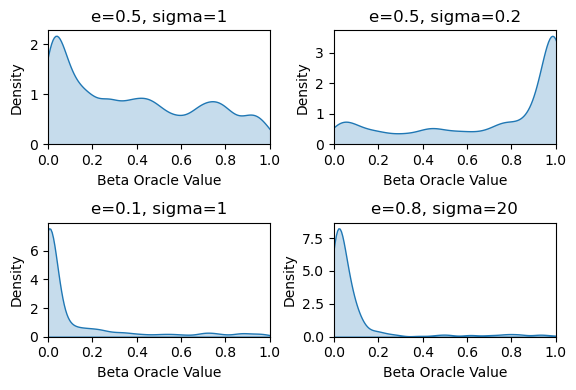

In [5]:
def plot_oracles_density(N_oracles, N_failing_oracles, e1, e2, e3, e4, sigma1, sigma2, sigma3, sigma4):
    # Generate oracles for each combination of true essence and true sigma
    oracles_sets = [
        generate_beta_oracles(N_oracles, N_failing_oracles, e1, sigma1),
        generate_beta_oracles(N_oracles, N_failing_oracles, e2, sigma2),
        generate_beta_oracles(N_oracles, N_failing_oracles, e3, sigma3),
        generate_beta_oracles(N_oracles, N_failing_oracles, e4, sigma4)
    ]

    # Set up the matplotlib figure with 4 subplots
    fig, axes = plt.subplots(2, 2, figsize=(6, 4))
    axes = axes.flatten()

    # Titles for each subplot
    titles = [
        f'a={e1}, b={sigma1}',
        f'a={e2}, b={sigma2}',
        f'a={e3}, b={sigma3}',
        f'a={e4}, b={sigma4}'
    ]

    # Plot each oracle set
    for i, (oracles, true_oracles) in enumerate(oracles_sets):
        oracle_values = np.array(oracles)
        sns.kdeplot(oracle_values, bw_adjust=0.5, fill=True, ax=axes[i])
        axes[i].set_xlim(0, 1)
        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Beta Oracle Value')
        axes[i].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

e1, e2, e3, e4 = 0.5, 0.5, 0.1, 0.8
sigma1, sigma2, sigma3, sigma4 = 1, 0.2, 1, 20
plot_oracles_density(500, 60, e1, e2, e3, e4, sigma1, sigma2, sigma3, sigma4)
